## Aula 16: K-Means + PCA

## Kmeans

In [1]:
#import 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.datasets import make_blobs, load_wine, load_digits
from sklearn.cluster import KMeans
from math import sqrt

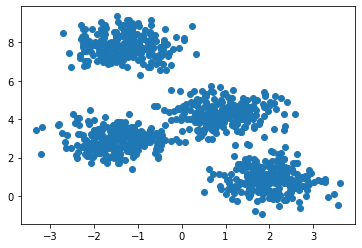

In [2]:
#geracao dos dados
X, y = make_blobs(n_samples=1000, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:,0], X[:,1])

Para um ser humano, é muito fácil perceber quantos grupos existem acima.
No aprendizado de máquina existem algoritmos de clusterização/agrupamento para realização dessa tarefa

In [3]:
X[:10]

array([[-2.00412818,  7.85263232],
       [ 0.67047877,  4.04094275],
       [-2.26367804,  8.27306782],
       [-2.35072954,  2.27723705],
       [ 2.22873982,  1.14538615],
       [ 0.91433877,  4.55014643],
       [ 0.89470026,  4.98592215],
       [ 1.81983412, -0.93002217],
       [ 0.90537165,  3.89568041],
       [-0.04259341,  4.53615561]])

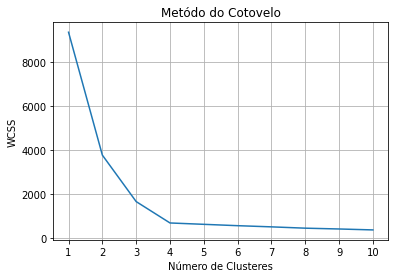

In [4]:
#avaliando número de grupos
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Metódo do Cotovelo')
plt.xlabel('Número de Clusteres')
plt.ylabel('WCSS')
plt.xticks(range(1, 11), range(1, 11))
plt.grid()
plt.show()

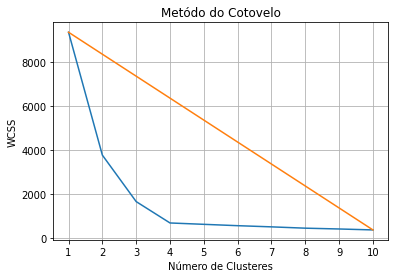

In [5]:
#avaliando número de grupos
wcss = []
n = 11
for i in range(1, n):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, n), wcss)
plt.title('Metódo do Cotovelo')
plt.xlabel('Número de Clusteres')
plt.ylabel('WCSS')
plt.xticks(range(1, n), range(1, n))
# plt.plot(wcss[0], wcss[-1])
plt.plot([1, n-1], [wcss[0], wcss[-1]])
plt.grid()
plt.show()

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

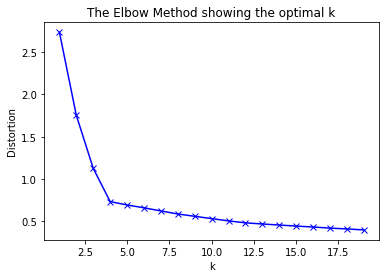

In [6]:
# k means determine k
error = []
K = range(1, 20)
for k in K:
    kmeans = KMeans(n_clusters=k).fit(X)
    error.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, error, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

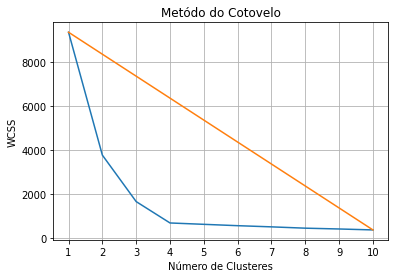

In [7]:
plt.plot(range(1, 11), wcss)
plt.title('Metódo do Cotovelo')
plt.xlabel('Número de Clusteres')
plt.ylabel('WCSS')
plt.xticks(range(1, 11), range(1, 11))
plt.grid()

plt.plot([1, 10], [wcss[0], wcss[9]])


plt.show()

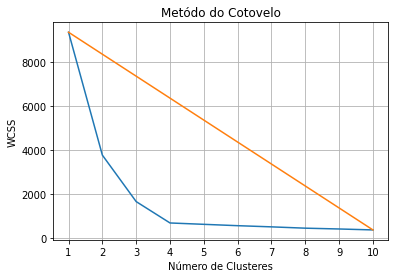

In [8]:
    
plt.plot(range(1, 11), wcss)
plt.title('Metódo do Cotovelo')
plt.xlabel('Número de Clusteres')
plt.ylabel('WCSS')
plt.xticks(range(1, 11), range(1, 11))
plt.grid()
plt.plot([1, 10], [wcss[0], wcss[9]])
plt.show()

x, y, 1
x1, y1, 1
x2, y2, 1

D = |x*y1 + y*x2 + x1*y2 - y1*x2 - y*x1 - x*y2|


D = |x(y1 - y2) + y(x2 - x1) + x1*y2 - y1*x2|



$d = \frac{|(y_2 - y_1)*x_0  - (x_2 - x_1)*y_0 + x_2*y_1 - x_1*y_2|}{\sqrt{(x_2-x_1)^2 + (y_2-y_1)^2)}} $

In [9]:
def optimal_number_of_clusters(wcss, x1, x2):
    x1, y1 = x1, wcss[0]
    x2, y2 = x2, wcss[-1]

    distances = []
    for i, y0 in enumerate(wcss):
        x0 = i+x1
#         y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
        
    return distances.index(max(distances)) + x1


In [10]:
n = optimal_number_of_clusters(error, 1, 20)
print(n)

n = optimal_number_of_clusters(wcss, 1, 11)
print(n)

4
4


In [11]:
kmeans = KMeans(n_clusters=n)

kmeans.fit_predict(X)

array([1, 3, 1, 0, 2, 3, 3, 2, 3, 3, 1, 2, 0, 1, 2, 0, 0, 1, 3, 2, 3, 1,
       2, 2, 2, 0, 2, 2, 2, 0, 2, 3, 1, 0, 1, 3, 1, 3, 0, 0, 3, 3, 3, 0,
       1, 3, 3, 1, 0, 3, 2, 3, 3, 0, 1, 2, 3, 3, 1, 1, 2, 2, 0, 0, 0, 1,
       3, 0, 1, 1, 1, 1, 1, 0, 3, 1, 3, 1, 0, 2, 3, 3, 3, 0, 2, 3, 3, 3,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 3, 3, 2, 0, 3, 2, 3, 0, 3, 1, 0, 2,
       3, 3, 0, 1, 0, 0, 3, 0, 2, 2, 2, 1, 0, 0, 3, 2, 3, 1, 0, 2, 2, 3,
       0, 3, 3, 3, 0, 3, 2, 1, 2, 1, 2, 3, 1, 1, 2, 3, 1, 1, 2, 3, 3, 3,
       0, 3, 3, 3, 2, 0, 1, 2, 3, 3, 3, 3, 1, 1, 3, 2, 0, 2, 2, 2, 0, 2,
       0, 2, 2, 3, 0, 3, 0, 3, 3, 0, 2, 0, 2, 1, 0, 3, 2, 2, 0, 1, 0, 1,
       0, 0, 0, 3, 1, 1, 2, 2, 0, 3, 1, 3, 1, 0, 3, 1, 0, 3, 3, 2, 2, 1,
       3, 3, 3, 1, 0, 3, 3, 0, 1, 1, 3, 0, 3, 3, 0, 2, 0, 2, 2, 0, 3, 0,
       2, 2, 1, 1, 1, 1, 1, 1, 3, 0, 1, 0, 0, 2, 0, 3, 1, 3, 2, 1, 3, 2,
       1, 0, 3, 0, 1, 2, 2, 3, 2, 0, 1, 1, 0, 1, 0, 3, 2, 1, 0, 3, 0, 0,
       0, 3, 0, 1, 2, 0, 3, 1, 1, 2, 1, 2, 3, 1, 2,

In [12]:
df_X = pd.DataFrame(X)
df_X = df_X.append({0:1.67, 1:7.3}, ignore_index=True)
# np.append(X, [1.67, 7.3])
# clustered_data = clustered_data.append([1.67, 7.3, 0])

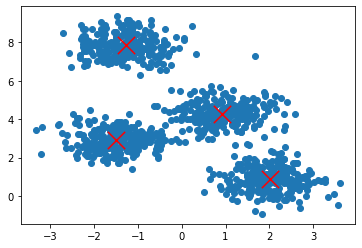

/home/lucas_bgabriel/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x', ylabel='y'>

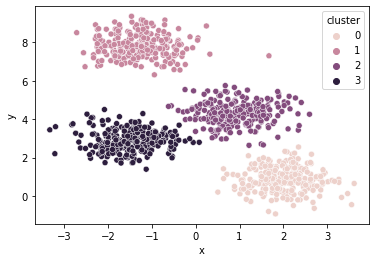

In [13]:
#avaliando posição dos centróides e grupos formados
import seaborn as sns
kmeans = KMeans(n_clusters=n, init='random', max_iter=30, n_init=10)
pred_y = kmeans.fit_predict(df_X)
plt.scatter(df_X[0], df_X[1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red',marker = 'x')
plt.show()

clustered_data = pd.concat([df_X, pd.Series(pred_y)],axis=1)
clustered_data.columns = ['x','y','cluster']
clustered_data
sns.scatterplot(clustered_data.x, clustered_data.y,hue = clustered_data.cluster)

In [14]:
df_iris = sns.load_dataset('iris')

In [15]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [16]:
df_iris['species'].value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

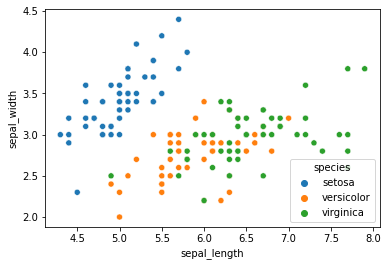

In [17]:
sns.scatterplot(data=df_iris, x='sepal_length', y='sepal_width', hue='species')

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

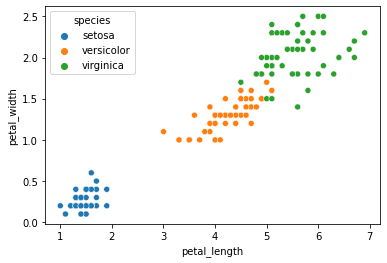

In [18]:
sns.scatterplot(data=df_iris, x='petal_length', y='petal_width', hue='species')

In [19]:
del df_iris['species']

In [20]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [21]:
wcss = []

n = 20
intervalo = range(1, n)
for n_cluster in intervalo:
    kmeans = KMeans(n_clusters=n_cluster)
    kmeans.fit(df_iris)
    wcss.append(kmeans.inertia_)


In [22]:
wcss[:4]

[681.3705999999996, 152.34795176035797, 78.851441426146, 57.22847321428572]

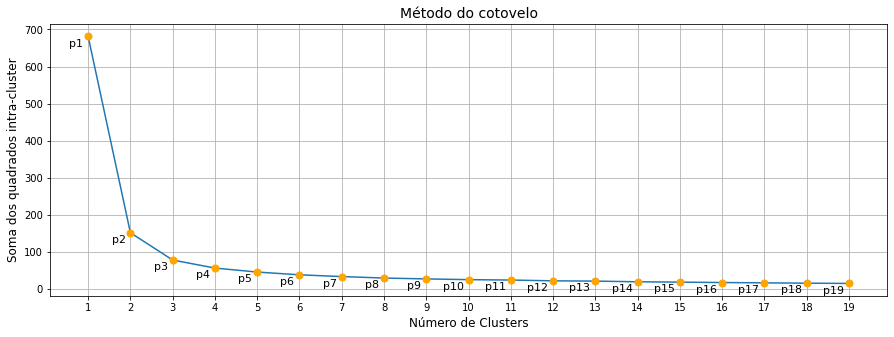

In [23]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set(xlabel='Número de Clusters', ylabel='Soma dos quadrados intra-cluster')
ax.set_title(label='Método do cotovelo', fontsize=14)

# plt.rc('font', size=14)
# ax.title.get_label().set_fontsize(14)
ax.xaxis.get_label().set_fontsize(12)
ax.yaxis.get_label().set_fontsize(12)
plt.plot(intervalo, wcss, linestyle='-')
plt.plot(intervalo, wcss, marker='o', linestyle='', color='orange', markersize=7)

plt.xticks(intervalo)
plt.grid()

for x, y in zip(intervalo, wcss):
    texto = f"p{x}"
    plt.annotate(texto,
                (x, y),
                textcoords='offset points',
                xytext=(-5, -10),
                ha='right',
                fontsize=11)

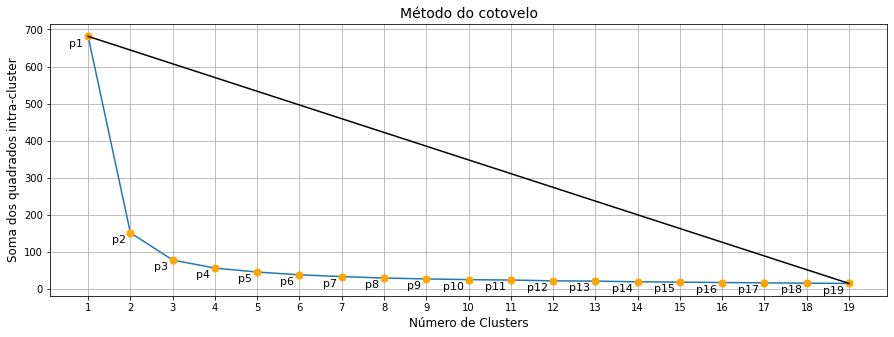

In [24]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set(xlabel='Número de Clusters', ylabel='Soma dos quadrados intra-cluster')
ax.set_title(label='Método do cotovelo', fontsize=14)

# plt.rc('font', size=14)
# ax.title.get_label().set_fontsize(14)
ax.xaxis.get_label().set_fontsize(12)
ax.yaxis.get_label().set_fontsize(12)
plt.plot(intervalo, wcss, linestyle='-')
plt.plot(intervalo, wcss, marker='o', linestyle='', color='orange', markersize=7)

plt.xticks(intervalo)
plt.grid()

for x, y in zip(intervalo, wcss):
    texto = f"p{x}"
    plt.annotate(texto,
                (x, y),
                textcoords='offset points',
                xytext=(-5, -10),
                ha='right',
                fontsize=11)
plt.plot([1, 19], [wcss[0], wcss[-1]], color='black')

In [25]:
n = optimal_number_of_clusters(wcss, 1, n)

In [26]:
n

3

In [27]:
kmeans = KMeans(n_clusters=n)

In [28]:
df_iris['predict'] = kmeans.fit_predict(df_iris)
df_iris

,sepal_length,sepal_width,petal_length,petal_width,predict
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


In [29]:
df_iris.predict.value_counts()

2    62
1    50
0    38
Name: predict, dtype: int64

<AxesSubplot:xlabel='predict', ylabel='count'>

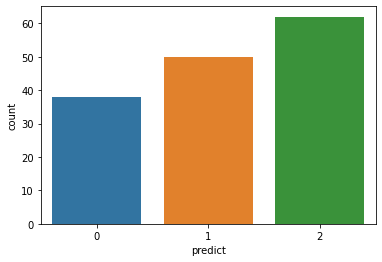

In [30]:
sns.countplot(data=df_iris, x='predict')

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

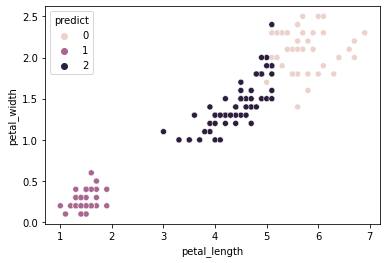

In [31]:
sns.scatterplot(data=df_iris, x='petal_length', y='petal_width', hue='predict')

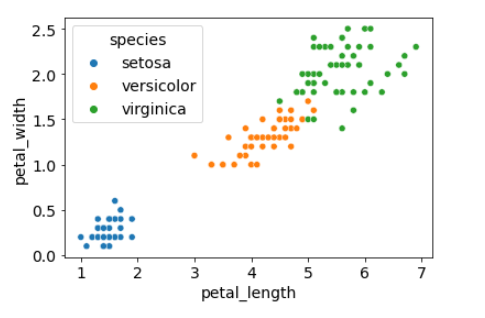

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

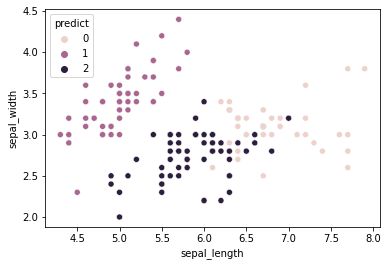

In [32]:
sns.scatterplot(data=df_iris, x='sepal_length', y='sepal_width', hue='predict')

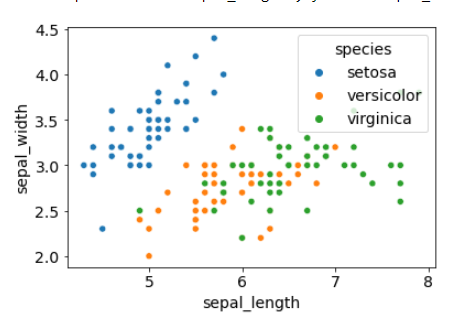

In [33]:
data_wine = load_wine()

In [34]:
data_wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [35]:
data_wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [36]:
np.unique(data_wine['target'])

array([0, 1, 2])

In [37]:
data_wine['target_names']

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [38]:
data_wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [39]:
df_wine = pd.DataFrame(data_wine['data'], columns=data_wine['feature_names'])
df_wine['target'] = data_wine['target']
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


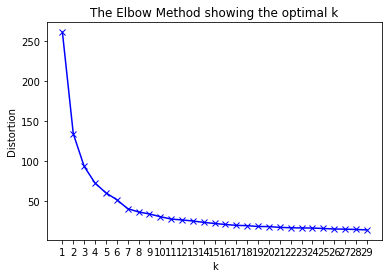

In [40]:
X = df_wine.drop('target', axis=1)
y = df_wine['target']

# k means determine k
error = []
wcss = []
K = range(1, 30)
for k in K:
    kmeans = KMeans(n_clusters=k).fit(X)
    error.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    wcss.append(kmeans.inertia_)

# Plot the elbow
plt.plot(K, error, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.xticks(range(1, 30), range(1, 30))
plt.show()

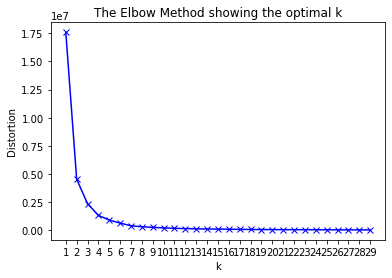

In [41]:
# Plot the elbow
plt.plot(K, wcss, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.xticks(K, K)
plt.show()

In [42]:
optimal_number_of_clusters(error, 1, 30)

7

In [43]:
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


/home/lucas_bgabriel/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_phenols', ylabel='proanthocyanins'>

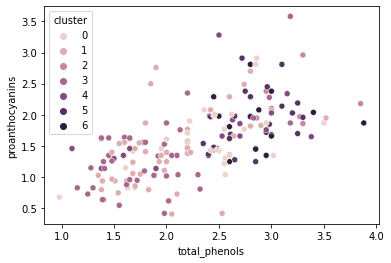

In [44]:
# KMeans(n_clusters=7).fit_predict(X)

#avaliando posição dos centróides e grupos formados
import seaborn as sns
kmeans = KMeans(n_clusters=7, init='random', max_iter=30, n_init=10)
pred_y = kmeans.fit_predict(X)
# plt.scatter(df_X[0], df_X[1])
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red',marker = 'x')
# plt.show()

clustered_data = pd.concat([X, pd.Series(pred_y)],axis=1)
columns = clustered_data.columns.to_list()
columns[-1] = 'cluster'
columns
clustered_data.columns = columns 
clustered_data
sns.scatterplot(clustered_data.total_phenols, clustered_data.proanthocyanins,hue = clustered_data.cluster)



<AxesSubplot:xlabel='alcohol', ylabel='ash'>

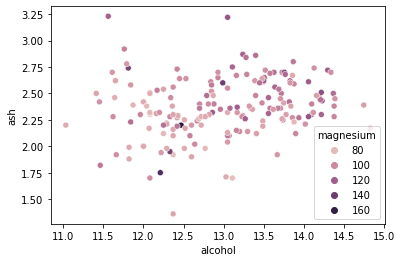

In [45]:
sns.scatterplot(x='alcohol', y='ash', data=df_wine, hue='magnesium')

In [46]:
X.columns.shape

(13,)

## PCA (PRINCIPAL COMPONENT ANALYSIS)

In [47]:
from sklearn.decomposition import PCA

In [48]:
df_iris = sns.load_dataset('iris')
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [49]:
df_iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [50]:
X = df_iris.drop('species', axis=1)
y = df_iris['species']

<AxesSubplot:>

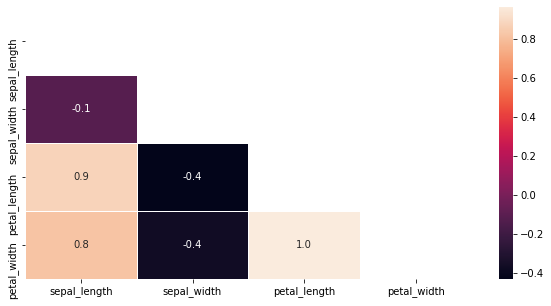

In [51]:
fig, ax = plt.subplots(figsize=(10, 5))
matriz = np.triu(X.corr())
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt='.1f', ax=ax, mask=matriz)

In [52]:
X.cov()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.685694,-0.042434,1.274315,0.516271
sepal_width,-0.042434,0.189979,-0.329656,-0.121639
petal_length,1.274315,-0.329656,3.116278,1.295609
petal_width,0.516271,-0.121639,1.295609,0.581006


In [53]:
pca = PCA()
principal_components = pca.fit_transform(X)

In [54]:
pca.n_components_

4

In [55]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [56]:
principal_components

array([[-2.68412563e+00,  3.19397247e-01, -2.79148276e-02,
        -2.26243707e-03],
       [-2.71414169e+00, -1.77001225e-01, -2.10464272e-01,
        -9.90265503e-02],
       [-2.88899057e+00, -1.44949426e-01,  1.79002563e-02,
        -1.99683897e-02],
       [-2.74534286e+00, -3.18298979e-01,  3.15593736e-02,
         7.55758166e-02],
       [-2.72871654e+00,  3.26754513e-01,  9.00792406e-02,
         6.12585926e-02],
       [-2.28085963e+00,  7.41330449e-01,  1.68677658e-01,
         2.42008576e-02],
       [-2.82053775e+00, -8.94613845e-02,  2.57892158e-01,
         4.81431065e-02],
       [-2.62614497e+00,  1.63384960e-01, -2.18793179e-02,
         4.52978706e-02],
       [-2.88638273e+00, -5.78311754e-01,  2.07595703e-02,
         2.67447358e-02],
       [-2.67275580e+00, -1.13774246e-01, -1.97632725e-01,
         5.62954013e-02],
       [-2.50694709e+00,  6.45068899e-01, -7.53180094e-02,
         1.50199245e-02],
       [-2.61275523e+00,  1.47299392e-02,  1.02150260e-01,
      

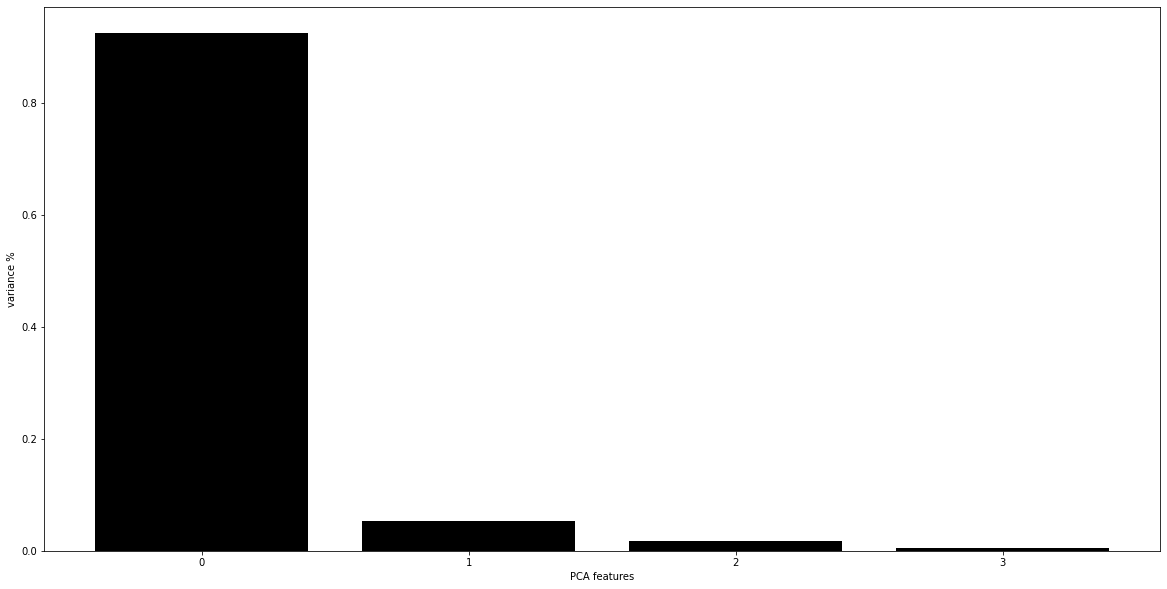

In [57]:
pca = PCA()
principalComponents = pca.fit_transform(X)

features = range(pca.n_components_)
plt.figure(figsize=(20, 10))

plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
PCA_components = pd.DataFrame(principalComponents)


[Text(0.5, 1.0, 'Exp Ratio by n components')]

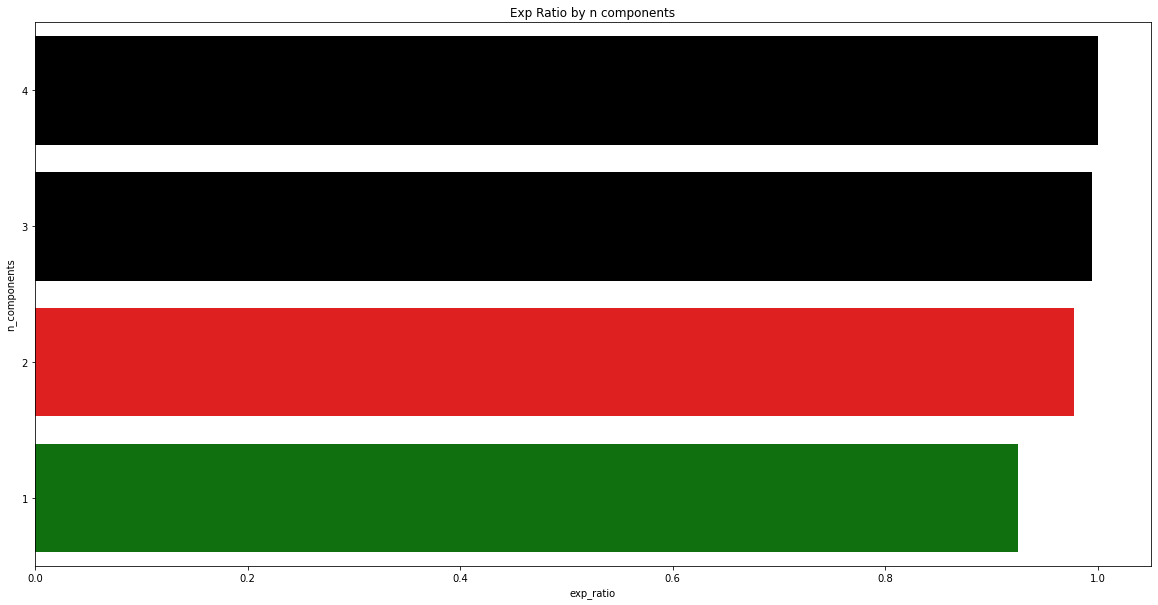

In [58]:
# plt.figure(figsize=(15, 5))
# plt.bar(range(pca.n_components_), np.cumsum(pca.explained_variance_ratio_))
# plt.xticks(range(pca.n_components_))
plt.figure(figsize=(20, 10))
feature_dict = {}

for col, val in zip(range(1, pca.n_components_+1), np.cumsum(pca.explained_variance_ratio_)):
    feature_dict[col] = val

feature_df = pd.DataFrame({'n_components':feature_dict.keys(), 'exp_ratio':feature_dict.values()})
feature_df = feature_df.sort_values(by='exp_ratio', ascending=False)

clrs = ['green' if (x < .95) else 'red' if (x < .98) else 'black' for x in feature_df.exp_ratio]
barplot = sns.barplot(orient = 'horizontal', y=feature_df.n_components, x=feature_df.exp_ratio, palette=clrs[::-1])
barplot.invert_yaxis()
barplot.set(title='Exp Ratio by n components')

In [59]:
pca = PCA(n_components=7)
pca.fit_transform(x_train_std)

sum(pca.explained_variance_ratio_)

NameError: name 'x_train_std' is not defined

In [ ]:
X.head()

In [ ]:
X.shape

In [ ]:
pca = PCA(n_components=2)

X_pca = pca.fit(X).transform(X)
X_pca.shape

In [ ]:
X

In [ ]:
X_pca

In [ ]:
# Percentage of variance explained for each components
print(f'Explained variance ratio (first two components): \
      {pca.explained_variance_ratio_}')

In [ ]:
sum(pca.explained_variance_ratio_)

In [ ]:
X_pca[:2]

In [ ]:
y.unique()

In [ ]:
X_pca[y == 'setosa', 0]

In [ ]:
target_names = y.unique()

plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, target in zip(colors, target_names):
    plt.scatter(X_pca[y == target, 0], X_pca[y == target, 1],
                color=color, alpha=.8, lw=2, label=target)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

In [ ]:
df_iris

In [ ]:
sns.scatterplot(data = df_iris, x='sepal_length', y='petal_length', hue='species')

In [60]:
rj = pd.read_csv('../datasets/imoveis_Rio_de_Janeiro.csv', sep=';')
rj.head()

,condominio,quartos,suites,vagas,area,bairro,atualizacao,preco,distancia,pm2
0,350,1,0.0,1.0,21,1,1,340000,99.0,16190.48
1,800,1,0.0,1.0,64,1,0,770000,99.0,12031.25
2,674,1,0.0,1.0,61,1,1,600000,99.0,9836.07
3,700,1,1.0,1.0,70,1,0,700000,99.0,10000.00
4,440,1,0.0,1.0,44,1,2,515000,99.0,11704.55


In [61]:
rj.describe()

,condominio,quartos,suites,vagas,area,bairro,atualizacao,preco,distancia,pm2
count,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1.997000e+03,1997.000000,1997.00000
mean,971.087631,2.128693,1.039559,1.153230,90.051577,4.023035,55.635954,1.229410e+06,68.447531,13256.74635
std,653.893691,0.793866,0.443091,0.453837,46.417486,2.102215,144.306062,1.155809e+06,82.046778,6977.37614
min,1.000000,1.000000,0.000000,0.000000,19.000000,1.000000,0.000000,1.300000e+05,0.030000,2600.00000
25%,550.000000,1.000000,1.000000,1.000000,60.000000,2.000000,0.000000,5.600000e+05,1.330000,7894.74000
50%,800.000000,2.000000,1.000000,1.000000,80.000000,4.000000,0.000000,9.000000e+05,99.000000,11904.76000
75%,1200.000000,3.000000,1.000000,1.000000,110.000000,6.000000,30.000000,1.550000e+06,99.000000,17156.86000
max,7071.000000,3.000000,3.000000,4.000000,475.000000,7.000000,870.000000,1.360000e+07,1334.470000,76666.67000


In [62]:
from sklearn.model_selection import train_test_split

In [63]:
x = rj.drop(['preco', 'pm2'], axis=1)
y = rj.preco

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
y

0        340000
1        770000
2        600000
3        700000
4        515000
         ...   
1992     680000
1993     650000
1994     629900
1995    1600000
1996     540000
Name: preco, Length: 1997, dtype: int64

In [67]:
scalar = StandardScaler()
x_train_std = scalar.fit_transform(x_train)
x_test_std = scalar.fit_transform(x_test)

In [68]:
x_train_std.shape

(1497, 8)

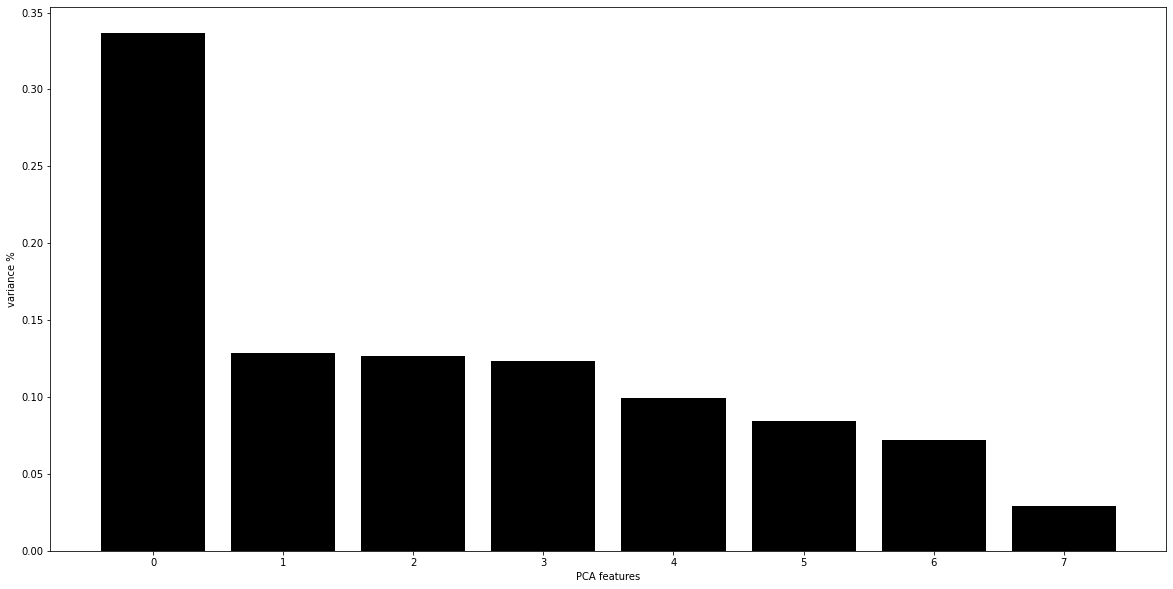

In [69]:
pca = PCA()
principalComponents = pca.fit_transform(x_train_std)

features = range(pca.n_components_)
plt.figure(figsize=(20, 10))

plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
PCA_components = pd.DataFrame(principalComponents)


[Text(0.5, 1.0, 'Exp Ratio by n components')]

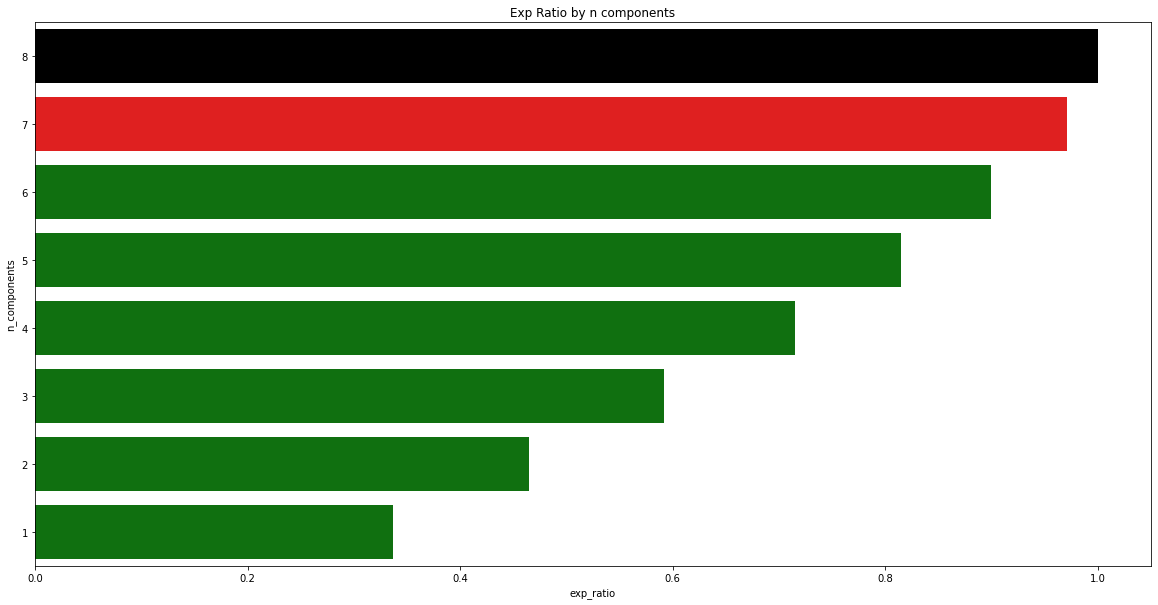

In [70]:
# plt.figure(figsize=(15, 5))
# plt.bar(range(pca.n_components_), np.cumsum(pca.explained_variance_ratio_))
# plt.xticks(range(pca.n_components_))
plt.figure(figsize=(20, 10))
feature_dict = {}

for col, val in zip(range(1, pca.n_components_+1), np.cumsum(pca.explained_variance_ratio_)):
    feature_dict[col] = val

feature_df = pd.DataFrame({'n_components':feature_dict.keys(), 'exp_ratio':feature_dict.values()})
feature_df = feature_df.sort_values(by='exp_ratio', ascending=False)

clrs = ['green' if (x < .95) else 'red' if (x < .98) else 'black' for x in feature_df.exp_ratio]
barplot = sns.barplot(orient = 'horizontal', y=feature_df.n_components, x=feature_df.exp_ratio, palette=clrs[::-1])
barplot.invert_yaxis()
barplot.set(title='Exp Ratio by n components')

### Wines dataset

In [71]:
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [72]:
X = df_wine.drop('target', axis=1)
y = df_wine['target']

In [73]:
X.cov()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,0.659062,0.085611,0.047115,-0.841093,3.139878,0.146887,0.192033,-0.015754,0.063518,1.028283,-0.013313,0.041698,164.567185
malic_acid,0.085611,1.248015,0.050277,1.076332,-0.870780,-0.234338,-0.458630,0.040733,-0.141147,0.644838,-0.143326,-0.292447,-67.548867
ash,0.047115,0.050277,0.075265,0.406208,1.122937,0.022146,0.031535,0.006358,0.001516,0.164654,-0.004682,0.000762,19.319739
alcalinity_of_ash,-0.841093,1.076332,0.406208,11.152686,-3.974760,-0.671149,-1.172083,0.150422,-0.377176,0.145024,-0.209118,-0.656234,-463.355345
magnesium,3.139878,-0.870780,1.122937,-3.974760,203.989335,1.916470,2.793087,-0.455563,1.932832,6.620521,0.180851,0.669308,1769.158700
total_phenols,0.146887,-0.234338,0.022146,-0.671149,1.916470,0.391690,0.540470,-0.035045,0.219373,-0.079998,0.062039,0.311021,98.171057
flavanoids,0.192033,-0.458630,0.031535,-1.172083,2.793087,0.540470,0.997719,-0.066867,0.373148,-0.399169,0.124082,0.558262,155.447492
nonflavanoid_phenols,-0.015754,0.040733,0.006358,0.150422,-0.455563,-0.035045,-0.066867,0.015489,-0.026060,0.040121,-0.007471,-0.044469,-12.203586
proanthocyanins,0.063518,-0.141147,0.001516,-0.377176,1.932832,0.219373,0.373148,-0.026060,0.327595,-0.033504,0.038665,0.210933,59.554334
color_intensity,1.028283,0.644838,0.164654,0.145024,6.620521,-0.079998,-0.399169,0.040121,-0.033504,5.374449,-0.276506,-0.705813,230.767480


In [74]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [75]:
y.unique()

array([0, 1, 2])

In [76]:
X.shape

(178, 13)

In [77]:
pca = PCA()
principalComponents = pca.fit_transform(X)



In [78]:
pca.n_components_

13

In [79]:
X.shape

(178, 13)

In [80]:
pca = PCA()
principalComponents = pca.fit_transform(X)

print('N Components: ',pca.n_components_)
print('Explained variance ratio:', sum(pca.explained_variance_ratio_))
pca.explained_variance_ratio_

N Components:  13
Explained variance ratio: 1.0


array([9.98091230e-01, 1.73591562e-03, 9.49589576e-05, 5.02173562e-05,
       1.23636847e-05, 8.46213034e-06, 2.80681456e-06, 1.52308053e-06,
       1.12783044e-06, 7.21415811e-07, 3.78060267e-07, 2.12013755e-07,
       8.25392788e-08])

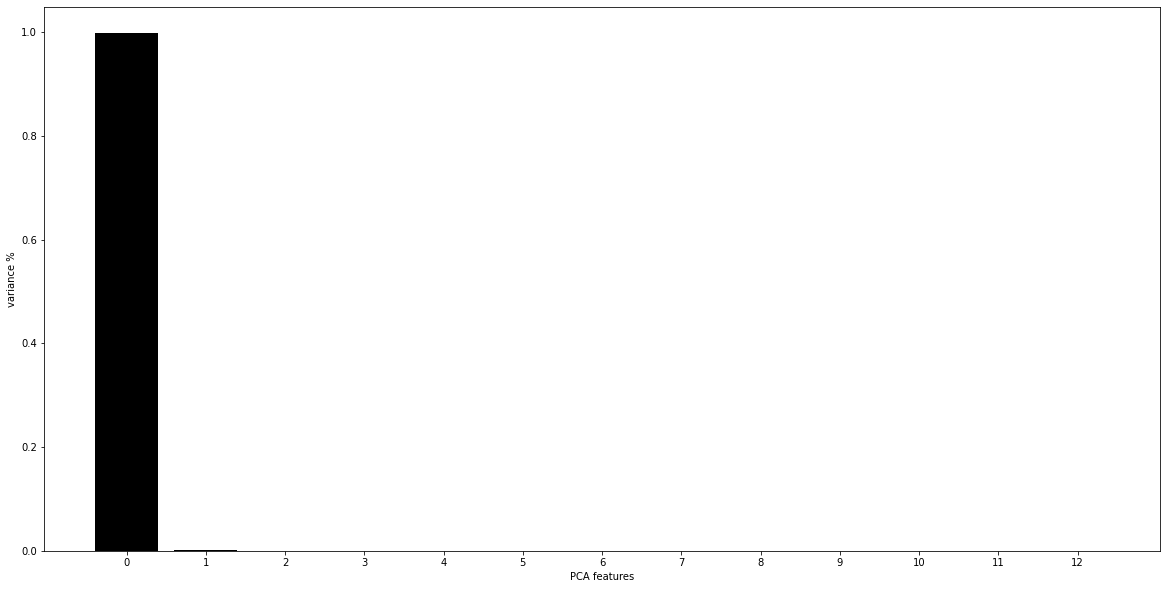

In [81]:
pca = PCA()
principalComponents = pca.fit_transform(X)

features = range(pca.n_components_)
plt.figure(figsize=(20, 10))

plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
PCA_components = pd.DataFrame(principalComponents)


In [82]:
sorted(enumerate(np.linalg.eig(X.cov())[0]/(np.linalg.eig(X.cov())[0].sum())), key=lambda x: x[1], reverse=True)

[(0, 0.9980912304918974),
 (1, 0.0017359156247057491),
 (2, 9.49589575514613e-05),
 (3, 5.021735618215138e-05),
 (4, 1.2363684687897784e-05),
 (5, 8.462130335248309e-06),
 (6, 2.806814557136547e-06),
 (7, 1.5230805328475325e-06),
 (8, 1.1278304393008661e-06),
 (12, 7.21415810819973e-07),
 (11, 3.780602665125203e-07),
 (10, 2.1201375460769144e-07),
 (9, 8.25392788093046e-08)]

In [83]:
PCA_components

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,318.562979,21.492131,3.130735,-0.250114,0.677078,0.568081,-0.619642,-0.199555,0.701280,-0.095008,0.088734,-0.038548,0.080264
1,303.097420,-5.364718,6.822835,-0.864035,-0.486096,0.014340,0.108865,0.604714,0.286717,-0.045782,0.039778,-0.057192,0.013593
2,438.061133,-6.537309,-1.113223,0.912411,0.380651,0.672404,0.785819,-0.500886,0.024547,-0.208960,0.237770,-0.048798,-0.035408
3,733.240139,0.192729,-0.917257,-0.541251,0.858662,0.599122,0.018770,0.190428,0.054277,0.531684,-0.096044,-0.166353,0.016344
4,-11.571428,18.489995,-0.554422,1.360896,0.276442,0.768884,-0.309976,0.119091,-0.195843,0.061771,0.316466,-0.007118,0.015278
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-6.980211,-4.541137,-2.474707,-3.155920,-2.348927,1.439001,-0.026425,0.043705,0.040167,0.087377,0.016509,0.098355,0.027251
174,3.131605,2.335191,-4.309931,-1.562181,-1.168003,0.128679,0.003859,-0.303185,-0.159759,0.159510,-0.048916,0.012626,-0.042645
175,88.458074,18.776285,-2.237577,-4.820708,-1.057336,0.215000,0.648489,0.068966,0.273675,-0.045336,-0.223049,0.096049,0.036175
176,93.456242,18.670819,-1.788392,-3.709352,-0.276956,-1.009229,0.414948,-0.145647,0.254468,0.059211,-0.030408,-0.052089,0.132759


Text(0, 0.5, 'PCA 2')

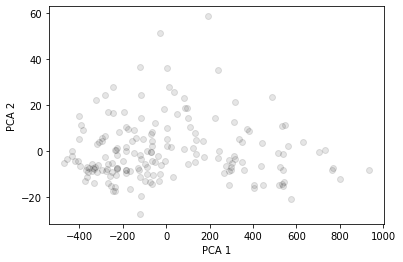

In [84]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')


In [85]:
from sklearn.preprocessing import StandardScaler

X_std = StandardScaler().fit_transform(X)
X_std

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

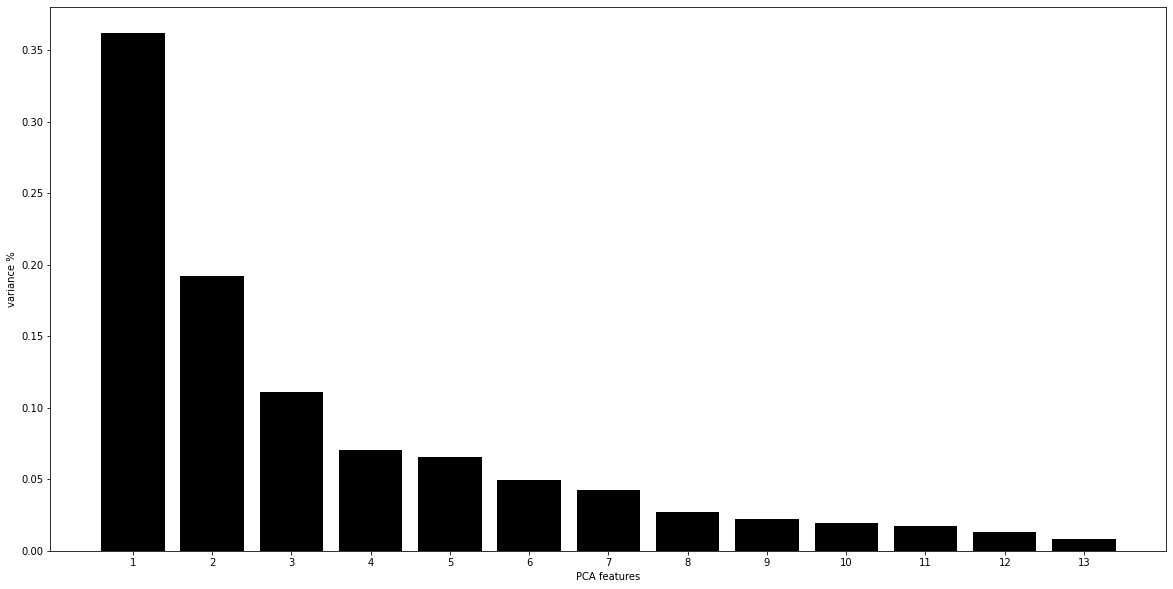

In [86]:
pca = PCA()
principalComponents = pca.fit_transform(X_std)

plt.figure(figsize=(20, 10))
features = range(1, pca.n_components_+1)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
PCA_components = pd.DataFrame(principalComponents)



Text(0, 0.5, 'PCA 2')

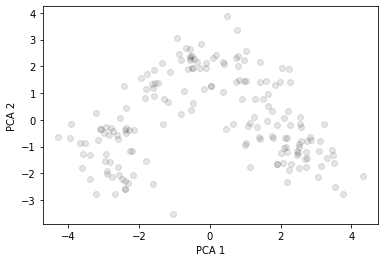

In [87]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')


In [88]:
pca = PCA(.9)
X_pca = pca.fit(X_std).transform(X_std)

In [89]:
pca.n_components_

8

In [90]:
sum(pca.explained_variance_ratio_)

0.9201754434577265

In [91]:
pca = PCA(n_components=7)
X_pca = pca.fit(X_std).transform(X_std)
sum(pca.explained_variance_ratio_)

0.8933679539739379

In [92]:
pca = PCA(n_components=4)
X_pca = pca.fit(X_std).transform(X_std)

In [93]:
X_pca

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01,
        -2.15631188e-01],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00,
        -2.91358318e-01],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01,
         7.24902309e-01],
       [ 3.75706561e+00, -2.75637191e+00, -1.76191842e-01,
         5.67983308e-01],
       [ 1.00890849e+00, -8.69830821e-01,  2.02668822e+00,
        -4.09765788e-01],
       [ 3.05025392e+00, -2.12240111e+00, -6.29395827e-01,
        -5.15637495e-01],
       [ 2.44908967e+00, -1.17485013e+00, -9.77094891e-01,
        -6.58305046e-02],
       [ 2.05943687e+00, -1.60896307e+00,  1.46281883e-01,
        -1.19260801e+00],
       [ 2.51087430e+00, -9.18070957e-01, -1.77096903e+00,
         5.62703612e-02],
       [ 2.75362819e+00, -7.89437674e-01, -9.84247490e-01,
         3.49381568e-01],
       [ 3.47973668e+00, -1.30233324e+00, -4.22735217e-01,
         2.68417600e-02],
       [ 1.75475290e+00, -6.11977229e-01, -1.19087832e+00,
      

In [94]:
# Percentage of variance explained for each components
print(f'Explained variance ratio (first two components): \
      {pca.explained_variance_ratio_[:2]}')

Explained variance ratio (first two components):       [0.36198848 0.1920749 ]


In [95]:
sum(pca.explained_variance_ratio_)

0.7359899907589932

Text(0.5, 1.0, 'PCA of Wines dataset')

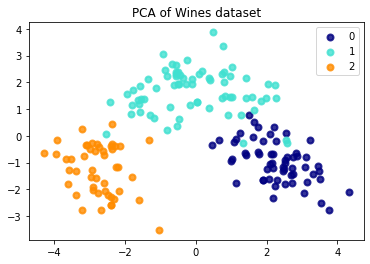

In [96]:
target_names = y.unique()

plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, target in zip(colors, target_names):
    plt.scatter(X_pca[y == target, 0], X_pca[y == target, 1],
                color=color, alpha=.8, lw=2, label=target)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of Wines dataset')

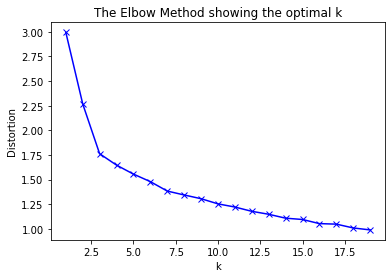

In [97]:
# k means determine k
error = []
K = range(1, 20)
for k in K:
    kmeans = KMeans(n_clusters=k).fit(X_pca)
    error.append(sum(np.min(cdist(X_pca, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, error, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [98]:
optimal_number_of_clusters(error, 1, 20)

4

In [99]:
df = pd.DataFrame(X_pca)

In [100]:
kmeans = KMeans(n_clusters=5).fit(X_pca)


df['target'] = kmeans.predict(X_pca)

In [101]:
df['target'].unique()

array([0, 2, 4, 3, 1], dtype=int32)

Text(0.5, 1.0, 'PCA of Wines dataset')

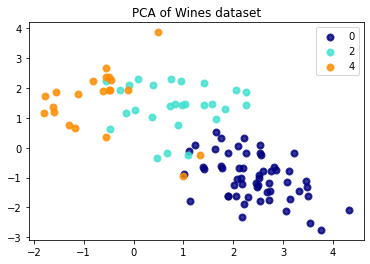

In [102]:
target_names = df['target'].unique()

plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, target in zip(colors, target_names):
    plt.scatter(X_pca[df['target'] == target, 0], X_pca[df['target'] == target, 1],
                color=color, alpha=.8, lw=2, label=target)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of Wines dataset')

### Wine Review

In [103]:
pd.read_csv?

In [104]:
df_wine = pd.read_csv('../datasets/winemag-data-130k-v2.csv', nrows=0)
df_wine.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')

In [105]:
df_wine = pd.read_csv('../datasets/winemag-data-130k-vw2.csv', usecols=df_wine.columns[1:])
df_wine.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [106]:
df_wine = pd.read_csv('../datasets/winemag-data-130k-v2.csv', index_col=0)
df_wine.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [107]:
df_wine.shape

(129971, 13)

In [108]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 13.9+ MB


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'region_2'),
  Text(1, 0, 'designation'),
  Text(2, 0, 'taster_twitter_handle'),
  Text(3, 0, 'taster_name'),
  Text(4, 0, 'region_1'),
  Text(5, 0, 'price'),
  Text(6, 0, 'country'),
  Text(7, 0, 'province'),
  Text(8, 0, 'variety'),
  Text(9, 0, 'description'),
  Text(10, 0, 'points'),
  Text(11, 0, 'title'),
  Text(12, 0, 'winery')])

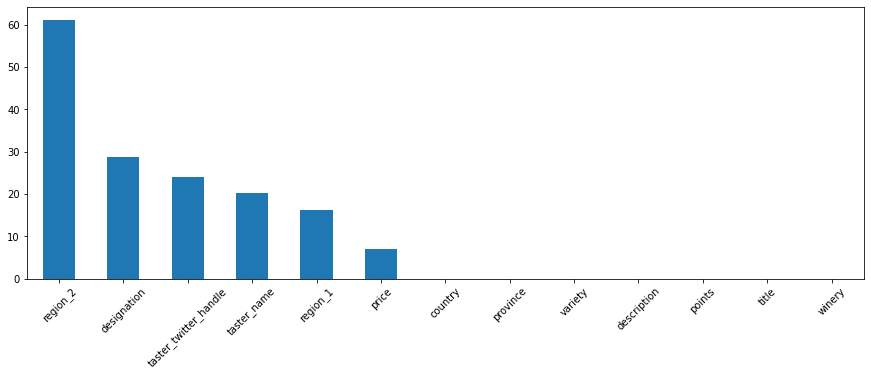

In [125]:
plt.figure(figsize=(15, 5))
((df_wine.isnull().sum()/len(df_wine))*100).sort_values(ascending=False).plot.bar()

plt.xticks(rotation=45)

In [126]:
df_wine.describe()

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


### Número de reviews por Pais

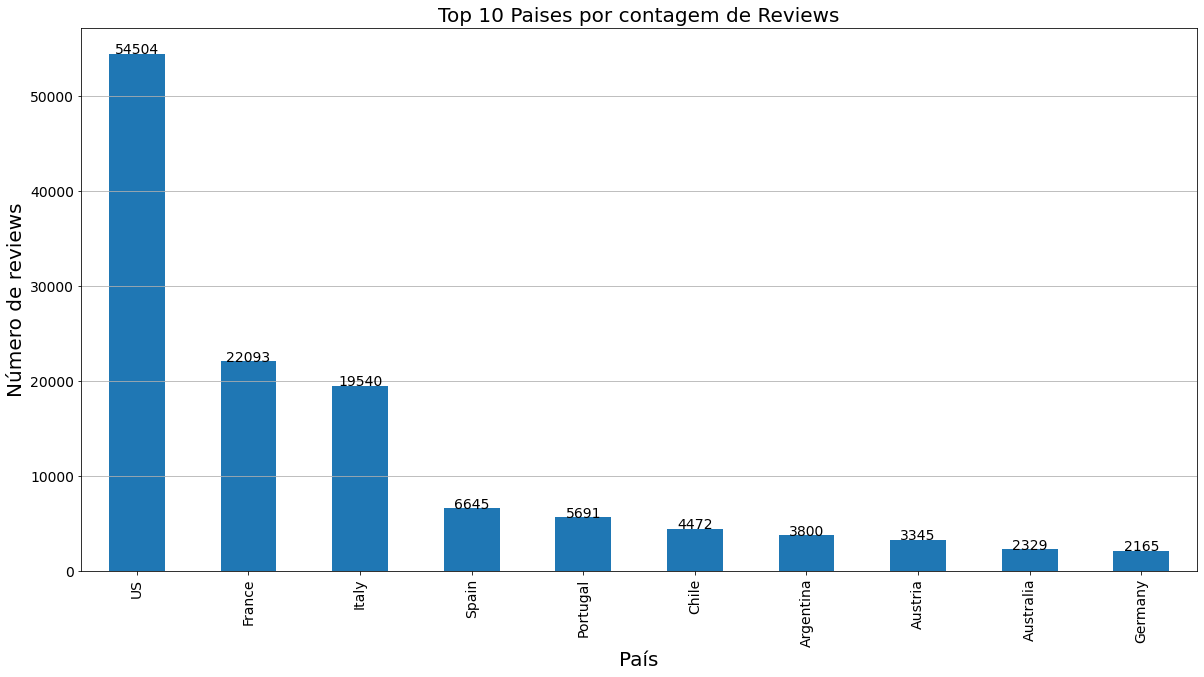

In [165]:
plt.figure(figsize=(20, 10))
N = 10
df_wine.country.value_counts().head(N).plot.bar()
plt.title(f'Top {N} Paises por contagem de Reviews', fontsize=20)
plt.ylabel('Número de reviews', fontsize=20)
plt.xlabel('País', fontsize=20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.grid(axis='y')

for idx, y in enumerate(df_wine.country.value_counts().head(N)):
    plt.text(idx, y, y, fontsize=14, ha='center')

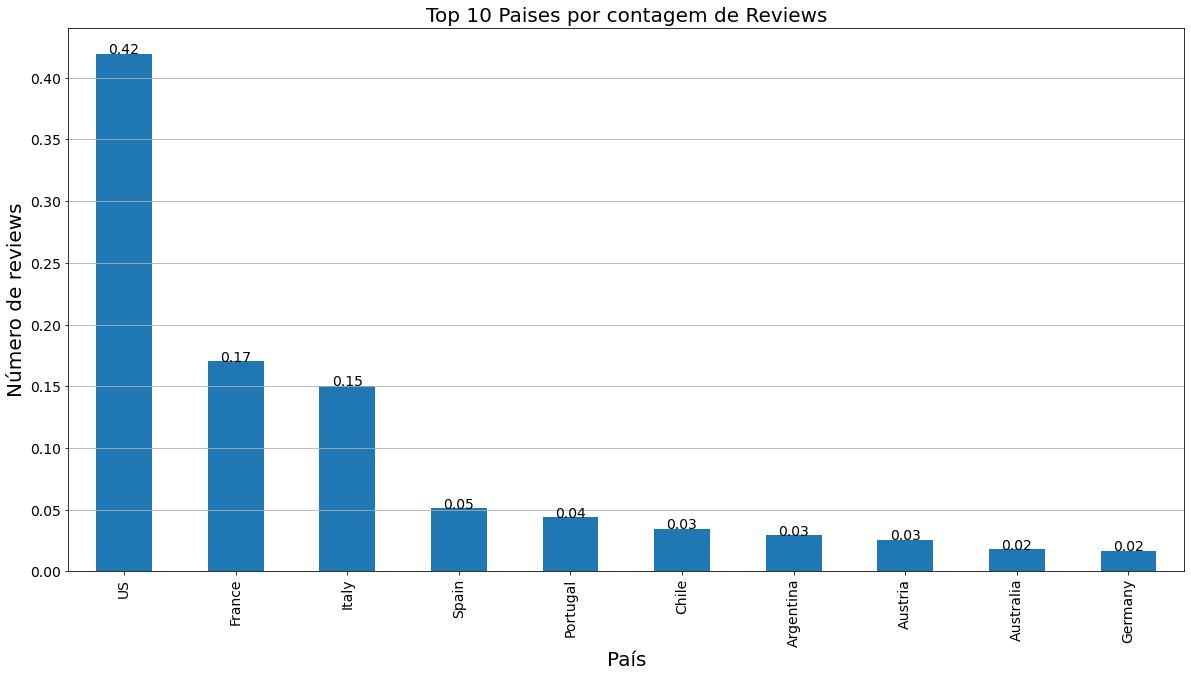

In [168]:
plt.figure(figsize=(20, 10))
N = 10
df_wine.country.value_counts(normalize=True).head(N).plot.bar()
plt.title(f'Top {N} Paises por contagem de Reviews', fontsize=20)
plt.ylabel('Número de reviews', fontsize=20)
plt.xlabel('País', fontsize=20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.grid(axis='y')

for idx, y in enumerate(df_wine.country.value_counts(normalize=True).head(N)):
    plt.text(idx, y, f'{y:.2f}', fontsize=14, ha='center')

In [171]:
(df_wine.country.value_counts()/len(df_wine)).head()

US          0.419355
France      0.169984
Italy       0.150341
Spain       0.051127
Portugal    0.043787
Name: country, dtype: float64

### Quantos paises existem na base?

In [177]:
len(df_wine.country.value_counts())

43

In [178]:
df_wine.country.value_counts().count()

43

#### Distribuição de pontos?

<AxesSubplot:>

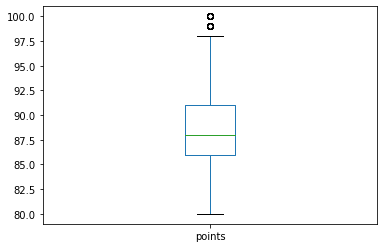

In [181]:
df_wine.points.plot.box()

<AxesSubplot:>

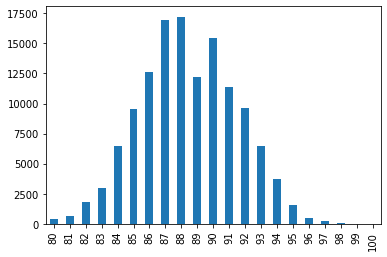

In [182]:
df_wine.points.value_counts().sort_index().plot.bar()

In [183]:
from scipy.stats import shapiro

In [184]:
shapiro(df_wine.points)

/home/lucas_bgabriel/.local/lib/python3.8/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9882420897483826, pvalue=0.0)

In [185]:
from scipy.stats import jarque_bera

In [186]:
jarque_bera(df_wine.points)

Jarque_beraResult(statistic=520.151872382616, pvalue=0.0)

#### Na média qual pais produz o melhor vinho?

Text(1, 90.22222222222223, '90.22')

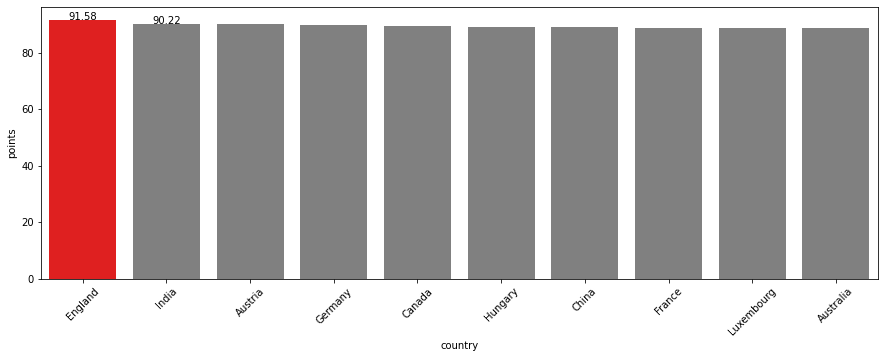

In [222]:
plt.figure(figsize=(15, 5))
# ax = df_wine.groupby('country').points.mean().sort_values(ascending=False).head(10).plot.bar()
df_top_10_points = df_wine.groupby('country').points.mean().sort_values(ascending=False).head(10)

clrs = ['grey' if x < max(df_top_10_points) else 'red' for x in df_top_10_points]
# clrs
sns.barplot(x=df_top_10_points.index, y=df_top_10_points, palette=clrs)
plt.xticks(rotation=45)
plt.text(0, df_top_10_points[0], f'{df_top_10_points[0]:.2f}', ha='center')
plt.text(1, df_top_10_points[1], f'{df_top_10_points[1]:.2f}', ha='center')

### Dataset Insurance

In [247]:
df_insurance = pd.read_csv('../datasets/insurance.csv')
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [248]:
df_insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [249]:
df_insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [250]:
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [251]:
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [252]:
df_insurance['smoker_code'] = df_insurance.smoker.apply(lambda x: 1 if x == 'yes' else 0)
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0


In [253]:
df_insurance['sex_code'] = np.where(df_insurance['sex']=='female', 1, 0)
df_insurance

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code
0,19,female,27.900,0,yes,southwest,16884.92400,1,1
1,18,male,33.770,1,no,southeast,1725.55230,0,0
2,28,male,33.000,3,no,southeast,4449.46200,0,0
3,33,male,22.705,0,no,northwest,21984.47061,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,0
1334,18,female,31.920,0,no,northeast,2205.98080,0,1
1335,18,female,36.850,0,no,southeast,1629.83350,0,1
1336,21,female,25.800,0,no,southwest,2007.94500,0,1


In [275]:
y = df_insurance.charges

In [273]:
x = df_insurance.drop(['sex', 'smoker', 'charges'], axis=1)
x.head()

,age,bmi,children,region,smoker_code,sex_code
0,19,27.900,0,southwest,1,1
1,18,33.770,1,southeast,0,0
2,28,33.000,3,southeast,0,0
3,33,22.705,0,northwest,0,0
4,32,28.880,0,northwest,0,0


In [279]:
x.region.value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

In [280]:
x_with_dummies = pd.get_dummies(x, columns=['region'], prefix_sep='_')
x_with_dummies.head()

,age,bmi,children,smoker_code,sex_code,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,1,0,0,0,1
1,18,33.770,1,0,0,0,0,1,0
2,28,33.000,3,0,0,0,0,1,0
3,33,22.705,0,0,0,0,1,0,0
4,32,28.880,0,0,0,0,1,0,0


In [281]:
from sklearn.cluster import KMeans

def calcula_wcss(data, n=20):
    wcss = []
    
    for k in range(2, n+1):
        model = KMeans(n_clusters=k, random_state=42) # EFEITOS DIDATICOS random_state=42
        model.fit(data)
        wcss.append(model.inertia_)
    
    return wcss

In [282]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_with_dummies, y, random_state=42) # EFEITOS DIDATICOS random_state=42

In [265]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

In [323]:
x_std = scalar.fit_transform(x_train)
x_test_std = scalar.fit_transform(x_test)

In [284]:
x_std

array([[-1.08716652, -1.14087456, -0.91749963, ...,  1.75420517,
        -0.59001549, -0.57159389],
       [-0.80210593, -0.66584152,  0.7436053 , ..., -0.57005875,
         1.69487075, -0.57159389],
       [ 0.83699246,  1.52879447, -0.08694717, ..., -0.57005875,
        -0.59001549,  1.74949385],
       ...,
       [ 1.33584849, -0.8879673 , -0.91749963, ..., -0.57005875,
        -0.59001549, -0.57159389],
       [-0.1607196 ,  2.84324666,  0.7436053 , ..., -0.57005875,
        -0.59001549,  1.74949385],
       [ 1.12205304, -0.10179179, -0.91749963, ..., -0.57005875,
        -0.59001549,  1.74949385]])

In [286]:
n = 20
wcss = calcula_wcss(x_std, n)
wcss

[7618.793046943498,
 6273.479933290321,
 4937.8256047289315,
 4650.507223723624,
 4424.046144905956,
 4138.400243022499,
 3949.5147949449547,
 3739.8287178531173,
 3540.3354067236314,
 3377.6112553487915,
 3181.4755190792457,
 3099.4492357093386,
 2932.4219218727358,
 2921.507970793638,
 2767.426929820545,
 2692.3825431393207,
 2557.408234854856,
 2505.065229474744,
 2429.387619078756]

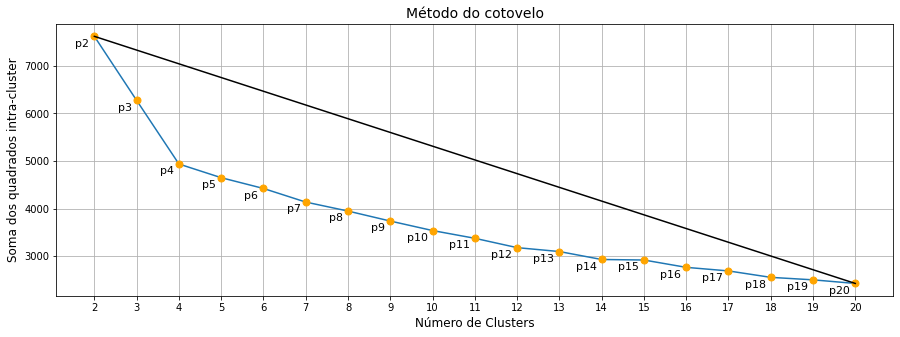

In [290]:
intervalo = range(2, 21)
fig, ax = plt.subplots(figsize=(15, 5))
ax.set(xlabel='Número de Clusters', ylabel='Soma dos quadrados intra-cluster')
ax.set_title(label='Método do cotovelo', fontsize=14)

# plt.rc('font', size=14)
# ax.title.get_label().set_fontsize(14)
ax.xaxis.get_label().set_fontsize(12)
ax.yaxis.get_label().set_fontsize(12)
plt.plot(intervalo, wcss, linestyle='-')
plt.plot(intervalo, wcss, marker='o', linestyle='', color='orange', markersize=7)

plt.xticks(intervalo)
plt.grid()

for x, y in zip(intervalo, wcss):
    texto = f"p{x}"
    plt.annotate(texto,
                (x, y),
                textcoords='offset points',
                xytext=(-5, -10),
                ha='right',
                fontsize=11)
plt.plot([2, 20], [wcss[0], wcss[-1]], color='black')

In [291]:
k_otimo = optimal_number_of_clusters(wcss, 2, 20)
k_otimo

4

In [292]:
model = KMeans(n_clusters=k_otimo, random_state=42)
model.fit(x_std)
clusters = model.predict(x_std)
clusters

array([3, 0, 2, ..., 1, 2, 2], dtype=int32)

In [325]:
c_test = model.predict(x_test_std)
c_test

array([1, 3, 3, 3, 3, 2, 3, 3, 1, 3, 2, 3, 0, 0, 0, 0, 0, 0, 0, 3, 2, 2,
       2, 1, 3, 1, 2, 3, 1, 0, 2, 3, 0, 3, 2, 1, 2, 2, 3, 0, 2, 3, 2, 3,
       0, 2, 3, 2, 0, 0, 0, 0, 3, 1, 0, 1, 1, 3, 2, 1, 2, 0, 2, 3, 1, 3,
       2, 0, 3, 2, 1, 1, 0, 0, 0, 0, 1, 3, 0, 2, 0, 1, 2, 1, 0, 1, 0, 3,
       3, 2, 1, 0, 1, 1, 0, 2, 0, 0, 3, 1, 3, 2, 0, 2, 1, 0, 0, 0, 1, 0,
       2, 0, 1, 1, 1, 2, 1, 2, 0, 3, 1, 3, 1, 0, 3, 3, 0, 1, 0, 0, 0, 0,
       0, 1, 2, 2, 1, 2, 3, 1, 3, 1, 0, 3, 0, 2, 3, 2, 3, 2, 3, 3, 0, 1,
       3, 1, 1, 0, 0, 1, 1, 3, 2, 1, 2, 0, 2, 3, 1, 2, 2, 2, 1, 3, 2, 0,
       2, 0, 3, 3, 1, 1, 3, 2, 1, 3, 1, 2, 0, 3, 2, 1, 1, 2, 0, 0, 3, 1,
       1, 2, 3, 3, 0, 3, 0, 0, 3, 3, 0, 2, 2, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       3, 3, 0, 0, 3, 0, 2, 3, 0, 0, 0, 3, 2, 2, 3, 0, 3, 2, 0, 0, 1, 2,
       3, 0, 3, 3, 2, 2, 0, 3, 2, 2, 2, 1, 3, 0, 2, 3, 1, 1, 3, 3, 0, 0,
       3, 1, 0, 2, 3, 1, 0, 0, 3, 0, 2, 1, 1, 1, 1, 0, 3, 1, 2, 3, 2, 1,
       0, 0, 1, 3, 1, 2, 1, 1, 0, 1, 0, 2, 0, 0, 2,

In [295]:
df_x_dummies = pd.DataFrame(x_std, columns=x_with_dummies.columns)
df_x_dummies.head()

,age,bmi,children,smoker_code,sex_code,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.087167,-1.140875,-0.917500,-0.508399,-0.991067,-0.577734,1.754205,-0.590015,-0.571594
1,-0.802106,-0.665842,0.743605,-0.508399,1.009014,-0.577734,-0.570059,1.694871,-0.571594
2,0.836992,1.528794,-0.086947,-0.508399,-0.991067,-0.577734,-0.570059,-0.590015,1.749494
3,0.551932,0.926476,-0.086947,1.966960,-0.991067,-0.577734,-0.570059,1.694871,-0.571594
4,0.480667,-0.268178,0.743605,-0.508399,1.009014,-0.577734,-0.570059,-0.590015,1.749494


In [296]:
df_x_dummies['cluster'] = clusters
df_x_dummies.head()

,age,bmi,children,smoker_code,sex_code,region_northeast,region_northwest,region_southeast,region_southwest,cluster
0,-1.087167,-1.140875,-0.917500,-0.508399,-0.991067,-0.577734,1.754205,-0.590015,-0.571594,3
1,-0.802106,-0.665842,0.743605,-0.508399,1.009014,-0.577734,-0.570059,1.694871,-0.571594,0
2,0.836992,1.528794,-0.086947,-0.508399,-0.991067,-0.577734,-0.570059,-0.590015,1.749494,2
3,0.551932,0.926476,-0.086947,1.966960,-0.991067,-0.577734,-0.570059,1.694871,-0.571594,0
4,0.480667,-0.268178,0.743605,-0.508399,1.009014,-0.577734,-0.570059,-0.590015,1.749494,2


<AxesSubplot:xlabel='age', ylabel='bmi'>

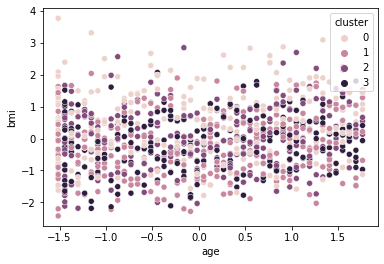

In [299]:
sns.scatterplot(data=df_x_dummies, x='age', y='bmi', hue='cluster')

<AxesSubplot:xlabel='children', ylabel='age'>

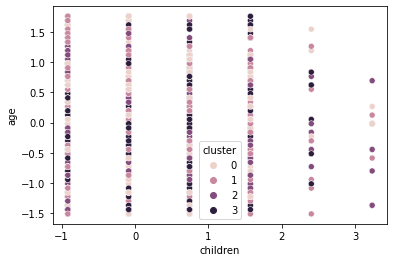

In [303]:
sns.scatterplot(data=df_x_dummies, x='children', y='age', hue='cluster')

### PCA

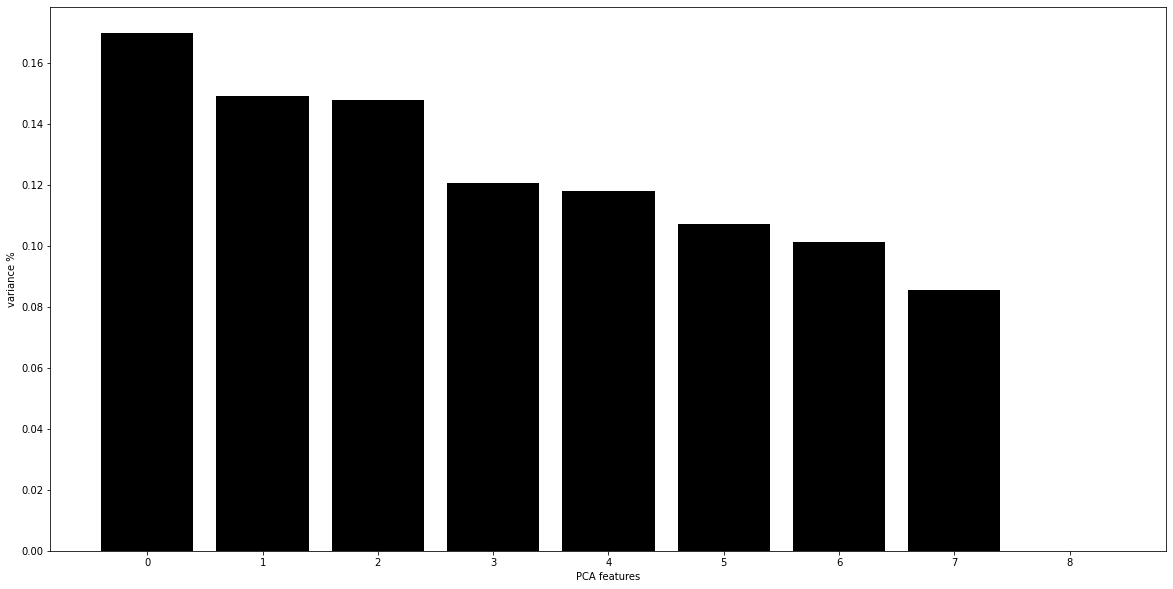

In [306]:
from sklearn.decomposition import PCA

pca = PCA()
principalComponents = pca.fit_transform(x_std)

features = range(pca.n_components_)
plt.figure(figsize=(20, 10))

plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
PCA_components = pd.DataFrame(principalComponents)


[Text(0.5, 1.0, 'Exp Ratio by n components')]

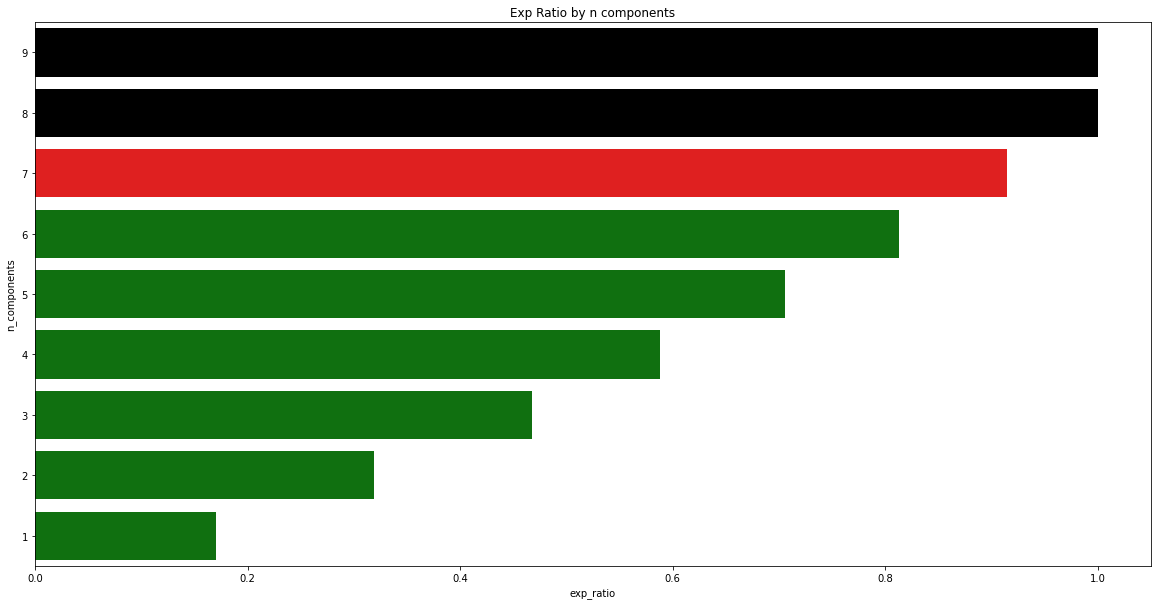

In [308]:
# plt.figure(figsize=(15, 5))
# plt.bar(range(pca.n_components_), np.cumsum(pca.explained_variance_ratio_))
# plt.xticks(range(pca.n_components_))
plt.figure(figsize=(20, 10))
feature_dict = {}

for col, val in zip(range(1, pca.n_components_+1), np.cumsum(pca.explained_variance_ratio_)):
    feature_dict[col] = val

feature_df = pd.DataFrame({'n_components':feature_dict.keys(), 'exp_ratio':feature_dict.values()})
feature_df = feature_df.sort_values(by='exp_ratio', ascending=False)

clrs = ['green' if (x < .90) else 'red' if (x < .98) else 'black' for x in feature_df.exp_ratio]
barplot = sns.barplot(orient = 'horizontal', y=feature_df.n_components, x=feature_df.exp_ratio, palette=clrs[::-1])
barplot.invert_yaxis()
barplot.set(title='Exp Ratio by n components')


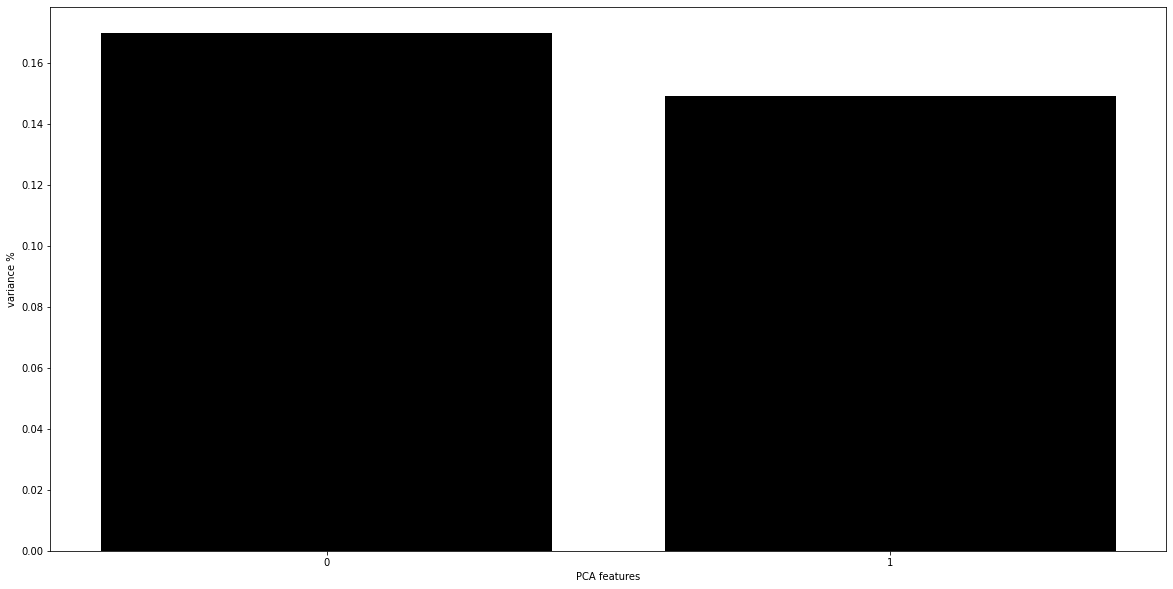

In [309]:
pca = PCA(n_components=2, random_state=42)
x_pca = pca.fit_transform(x_std)

features = range(pca.n_components_)
plt.figure(figsize=(20, 10))

plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
PCA_components = pd.DataFrame(principalComponents)


In [311]:
pca.explained_variance_ratio_.sum()

0.3192779336004436

In [313]:
df_pca = pd.DataFrame(x_pca, columns=['x_pca', 'y_pca'])
df_pca.head()

,x_pca,y_pca
0,-1.396417,-0.649991
1,1.122287,0.701931
2,0.872093,-1.607853
3,2.072986,0.929345
4,-0.001517,-1.565831


In [314]:
df_pca.shape

(1003, 2)

In [316]:
df_pca['cluster'] = clusters
df_pca.head()

,x_pca,y_pca,cluster
0,-1.396417,-0.649991,3
1,1.122287,0.701931,0
2,0.872093,-1.607853,2
3,2.072986,0.929345,0
4,-0.001517,-1.565831,2


Text(0.5, 1.0, 'Clusters dos 2 primeiros componentes principais')

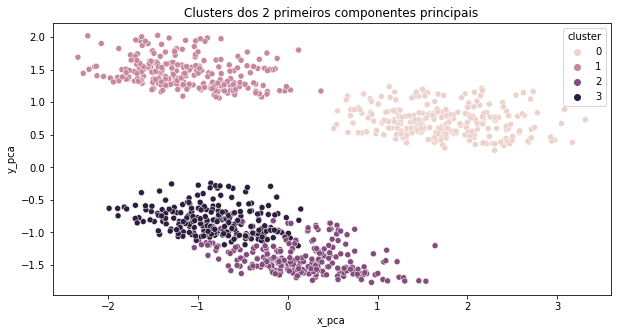

In [320]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data =df_pca, x='x_pca', y='y_pca', hue='cluster')
plt.title('Clusters dos 2 primeiros componentes principais')


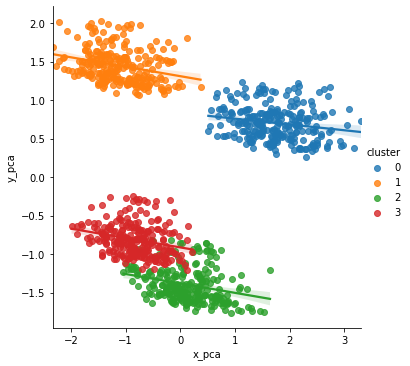

In [321]:
sns.lmplot(data =df_pca, x='x_pca', y='y_pca', hue='cluster')

In [330]:
#X TESTE
x_test_pca = pca.fit_transform(x_test_std)
df_pca_test = pd.DataFrame(x_test_pca, columns=['x_pca', 'y_pca'])
df_pca_test['cluster'] = c_test
df_pca_test.head()

,x_pca,y_pca,cluster
0,-1.285584,-0.922588,1
1,-1.546968,-0.761123,3
2,-1.077927,-1.233058,3
3,-1.052578,0.440695,3
4,-0.317858,-0.681650,3


In [363]:
df_pca['y'] = y_train.reset_index(drop=True)

In [350]:
# df_pca.dropna(inplace=True)

In [364]:
from sklearn.linear_model import LinearRegression

In [365]:
lr = LinearRegression()
x1 = df_pca.loc[df_pca.cluster == 1, ['x_pca', 'y_pca']]
y1 = df_pca.loc[df_pca.cluster == 1, ['y']]
lr.fit(x1, y1)


LinearRegression()

In [366]:
y_test

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
           ...     
342     13217.09450
308     11944.59435
1128    14358.36437
503     32548.34050
1197     5699.83750
Name: charges, Length: 335, dtype: float64

In [367]:
df_pca_test['y'] = y_test.reset_index(drop=True)
df_pca_test

,x_pca,y_pca,cluster,y
0,-1.285584,-0.922588,1,9095.06825
1,-1.546968,-0.761123,3,5272.17580
2,-1.077927,-1.233058,3,29330.98315
3,-1.052578,0.440695,3,9301.89355
4,-0.317858,-0.681650,3,33750.29180
...,...,...,...,...
330,-1.091876,-1.707592,1,13217.09450
331,0.111261,-1.442080,1,11944.59435
332,-0.055375,1.927575,2,14358.36437
333,1.821716,-0.579481,0,32548.34050


In [368]:
y_pred = lr.predict(df_pca_test.loc[df_pca_test.cluster==1,['x_pca', 'y_pca'] ])

In [379]:
df_pca_test.loc[df_pca_test.cluster==1,['y']].values

array([[ 9095.06825 ],
       [ 3732.6251  ],
       [ 2755.02095 ],
       [10923.9332  ],
       [ 9715.841   ],
       [ 7448.40395 ],
       [ 1708.92575 ],
       [25333.33284 ],
       [ 3645.0894  ],
       [10564.8845  ],
       [23045.56616 ],
       [ 6079.6715  ],
       [ 9411.005   ],
       [ 4846.92015 ],
       [28101.33305 ],
       [38511.6283  ],
       [41097.16175 ],
       [15230.32405 ],
       [23401.30575 ],
       [ 5031.26955 ],
       [ 6402.29135 ],
       [13129.60345 ],
       [ 1702.4553  ],
       [13019.16105 ],
       [37701.8768  ],
       [ 9778.3472  ],
       [30259.99556 ],
       [ 5594.8455  ],
       [11396.9002  ],
       [ 9288.0267  ],
       [ 7935.29115 ],
       [12404.8791  ],
       [37270.1512  ],
       [ 9866.30485 ],
       [37607.5277  ],
       [ 4518.82625 ],
       [13555.0049  ],
       [39125.33225 ],
       [13607.36875 ],
       [ 2396.0959  ],
       [39556.4945  ],
       [ 5757.41345 ],
       [29523.1656  ],
       [ 31

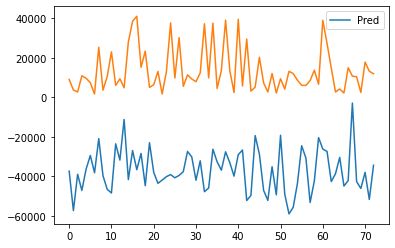

In [381]:
plt.plot(y_pred, label='Pred')
plt.plot(df_pca_test.loc[df_pca_test.cluster==1,['y']].values)
plt.legend()

### Digits

In [2]:
data_digits = load_digits()

In [3]:
data_digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
X = data_digits['data']
y = data_digits['target']

In [5]:
type(data_digits)

sklearn.utils.Bunch

In [6]:
data_digits.data.shape

(1797, 64)

In [7]:
X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [8]:
y[0]

0

In [9]:
X[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [10]:
data_digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

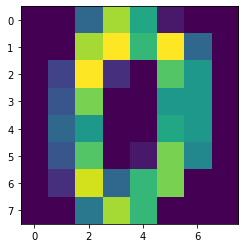

In [11]:
plt.imshow(data_digits.images[0])

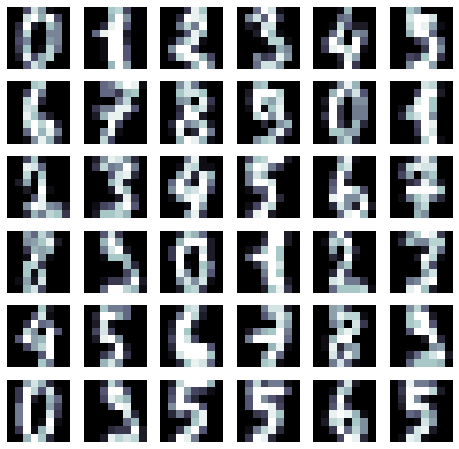

In [12]:
plt.figure(figsize=(8,8))
for i in range(6):
    for j in range(6):
        plt.subplot(6,6,1+j+6*i)
        plt.imshow(data_digits['images'][j+6*i],cmap=plt.cm.bone)
        plt.axis('off')
plt.show()

In [13]:
X.shape

(1797, 64)

In [15]:
from sklearn.decomposition import PCA

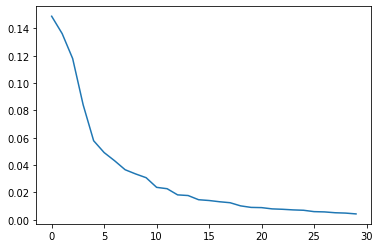

In [17]:
pca = PCA(n_components=30, whiten=False)
x_pca = pca.fit_transform(X)
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [18]:
pca = PCA()
x_pca = pca.fit_transform(X)
pca.n_components_

64

In [19]:
sum(pca.explained_variance_ratio_[:30])

0.9590854042457173

In [20]:
pca = PCA(n_components=30)
x_pca = pca.fit_transform(X)
pca.n_components_

30

In [21]:
sum(pca.explained_variance_ratio_)

0.9590828056904179

In [22]:
x_pca[0]

array([-1.25946644, 21.27488349, -9.46305466, 13.01418855, -7.12882371,
       -7.44065968,  3.25284218,  2.55347086, -0.58184507,  3.62571757,
        2.58599367,  1.55159657,  0.85443855, -3.33878065,  5.90665192,
        2.74338614,  0.41967864, -0.8986431 ,  0.70134833, -3.46218482,
        2.68222469,  1.00961431,  2.00363841,  1.29508772,  1.17557551,
        2.30222267,  3.6715671 , -0.94019709, -1.118518  ,  2.38824807])

In [23]:
sum(pca.explained_variance_ratio_)

0.9590828056904179

In [24]:
aproximation = pca.inverse_transform(x_pca)

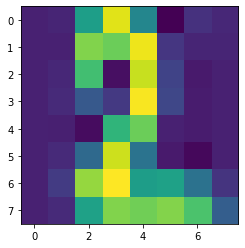

In [25]:
plt.imshow(aproximation[22].reshape(8,8))

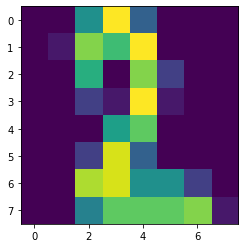

In [26]:
plt.imshow(data_digits['images'][22])

In [27]:
pca.explained_variance_ratio_[:2]

array([0.14890594, 0.13618771])

In [ ]:
plt.figure(figsize=(8,8))
for k in range(10):
    plt.plot(x_pca[y==k,0],x_pca[y==k,1],
             '*',color=plt.cm.Set3.colors[k],label=k)
plt.legend()
plt.show()